<P> <B> <font color=red size="4"> 5.Mean Shift Clustering</Font></B> </P>

<b><font color=green size="4">Mean Shift Clustering on the Iris Dataset:</font></b>

Mean Shift is a non-parametric clustering algorithm that does not require pre-specifying the number of clusters. It works by iteratively shifting points toward the mode (high-density regions) of a data distribution.

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ground truth

In [3]:
# Estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)
print(f"Estimated Bandwidth: {bandwidth:.3f}")

Estimated Bandwidth: 0.876


<b><font color=green size="4">Key Parameters in Mean Shift</font></b>

<b>Bandwidth:</b>
    <ol>
        <li>The bandwidth parameter determines the radius of the kernel used to estimate the data distribution.</li>
      
<li>The estimate_bandwidth function calculates an optimal value based on the data and a quantile parameter.</li></ol>
        
<b>bin_seeding:</b>
<ol>
<li>Enables faster clustering by reducing the number of initial candidate cluster centers.</li></ol>

In [4]:
# Apply Mean Shift clustering
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
y_mean_shift = mean_shift.fit_predict(X)

In [5]:
# Performance Metrics
silhouette_avg = silhouette_score(X, y_mean_shift)
calinski_harabasz = calinski_harabasz_score(X, y_mean_shift)
davies_bouldin = davies_bouldin_score(X, y_mean_shift)
adjusted_rand = adjusted_rand_score(y, y_mean_shift)
normalized_mutual_info = normalized_mutual_info_score(y, y_mean_shift)
homogeneity = homogeneity_score(y, y_mean_shift)
completeness = completeness_score(y, y_mean_shift)
v_measure = v_measure_score(y, y_mean_shift)

In [6]:
# Display the results
results = pd.DataFrame({
    "Metric": [
        "Silhouette Coefficient",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index",
        "Adjusted Rand Index",
        "Normalized Mutual Information",
        "Homogeneity",
        "Completeness",
        "V-Measure"
    ],
    "Score": [
        silhouette_avg,
        davies_bouldin,
        calinski_harabasz,
        adjusted_rand,
        normalized_mutual_info,
        homogeneity,
        completeness,
        v_measure
    ]
})

print(results)

                          Metric       Score
0         Silhouette Coefficient    0.685788
1           Davies-Bouldin Index    0.388552
2        Calinski-Harabasz Index  509.703427
3            Adjusted Rand Index    0.558371
4  Normalized Mutual Information    0.699401
5                    Homogeneity    0.553749
6                   Completeness    0.949020
7                      V-Measure    0.699401


In [7]:
# Reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

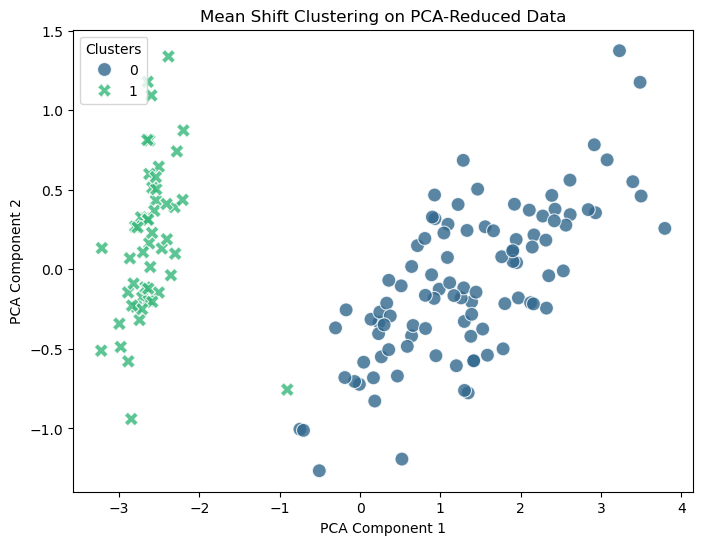

In [8]:
# Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_mean_shift, palette='viridis', style=y_mean_shift, s=100, alpha=0.8
)
plt.title('Mean Shift Clustering on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters')
plt.show()

<b><font color=green size="4">Tuning the Bandwidth:</font></b>
<ol>
<li>The choice of bandwidth significantly impacts the results. You can experiment with different values</li></ol>

In [9]:
bandwidth_values = [0.5, 1.0, 1.5, 2.0]
for bw in bandwidth_values:
    mean_shift = MeanShift(bandwidth=bw, bin_seeding=True)
    y_mean_shift = mean_shift.fit_predict(X)
    print(f"Bandwidth: {bw}, Silhouette Score: {silhouette_score(X, y_mean_shift):.3f}")


Bandwidth: 0.5, Silhouette Score: 0.301
Bandwidth: 1.0, Silhouette Score: 0.683
Bandwidth: 1.5, Silhouette Score: 0.686
Bandwidth: 2.0, Silhouette Score: 0.683


<b><font color=green size="4">Strengths of Mean Shift:</font></b>
<ol>
   <li> Non-parametric: No need to specify the number of clusters beforehand.
    Flexible: Works well with arbitrarily shaped clusters.</li></ol>

<b><font color=green size="4">Limitations:</font></b>
<ol>
   <li> Computationally expensive for large datasets.
    Sensitive to the bandwidth parameter.</li></ol>